# Import Libraires 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# 1 - Data Loading

In [4]:
train = 'input/nyc-taxi-trip-duration/train.csv'
test = 'input/nyc-taxi-trip-duration/test.csv'
dfTrain = pd.read_csv(train)
dfTest = pd.read_csv(test)

# 2 - Data Exploration

In [5]:
dfTrain.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
dfTest.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [7]:
dfTrain.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
dfTest.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

## Outlier's distribution

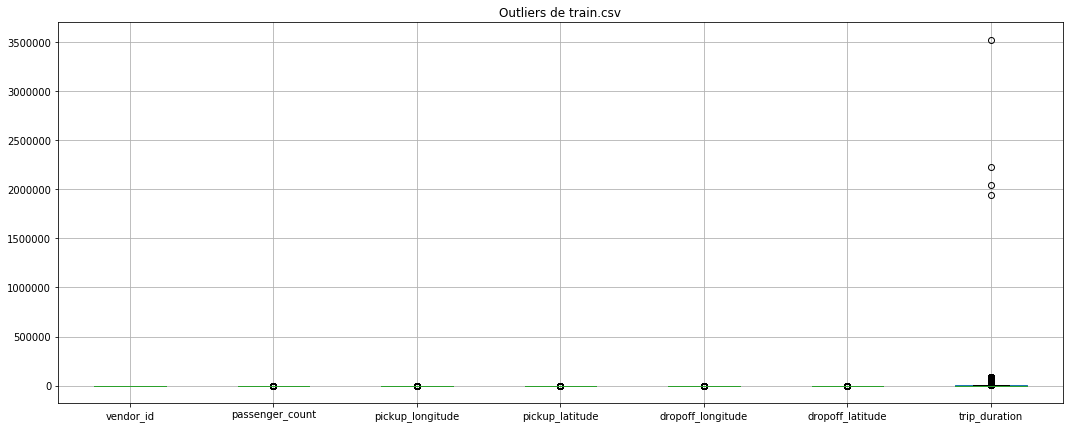

In [9]:
plt.subplots(figsize=(18,7))
plt.title("Outliers de train.csv")
dfTrain.boxplot();

In [10]:
print(dfTrain.loc[dfTrain['trip_duration'] > 350000])

               id  vendor_id      pickup_datetime     dropoff_datetime  \
355003  id1864733          1  2016-01-05 00:19:42  2016-01-27 11:08:38   
680594  id0369307          1  2016-02-13 22:38:00  2016-03-08 15:57:38   
924150  id1325766          1  2016-01-05 06:14:15  2016-01-31 01:01:07   
978383  id0053347          1  2016-02-13 22:46:52  2016-03-25 18:18:14   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
355003                1        -73.789650        40.643559         -73.956810   
680594                2        -73.921677        40.735252         -73.984749   
924150                1        -73.983788        40.742325         -73.985489   
978383                1        -73.783905        40.648632         -73.978271   

        dropoff_latitude store_and_fwd_flag  trip_duration  
355003         40.773087                  N        1939736  
680594         40.759979                  N        2049578  
924150         40.727676                

#### On a 4 outliers dans trip_duration, on peut se permettre de les effacés des (1458644) données du dataset

In [11]:
print(f"{dfTrain.shape}")
dfTrain = dfTrain.loc[dfTrain['trip_duration']< 350000]
print(f"{dfTrain.shape}")

(1458644, 11)
(1458640, 11)


### Correlation check 

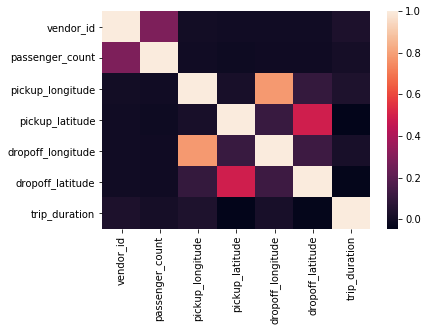

In [12]:
sns.heatmap(dfTrain.corr())

#### Aucune correlation apparente

## Machine Learning

In [13]:
dfTrain = dfTrain[dfTrain['passenger_count']>= 1]

In [55]:
dfTrain['pickup_datetime'] = pd.to_datetime(dfTrain['pickup_datetime'])
dfTest['pickup_datetime'] = pd.to_datetime(dfTest['pickup_datetime'])

dfTrain['month'] = dfTrain['pickup_datetime'].dt.month
dfTrain['day'] = dfTrain['pickup_datetime'].dt.day
dfTrain['weekday'] = dfTrain['pickup_datetime'].dt.weekday
dfTrain['hour'] = dfTrain['pickup_datetime'].dt.hour
dfTrain['minute'] = dfTrain['pickup_datetime'].dt.minute

dfTest['month'] = dfTest['pickup_datetime'].dt.month
dfTest['day'] = dfTest['pickup_datetime'].dt.day
dfTest['weekday'] = dfTest['pickup_datetime'].dt.weekday
dfTest['hour'] = dfTest['pickup_datetime'].dt.hour
dfTest['minute'] = dfTest['pickup_datetime'].dt.minute

dfTrain['trip_duration'] = np.log1p(dfTrain['trip_duration'].values)

dfTrain.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,day,weekday,hour,minute
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493,3,14,0,17,24
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282,6,12,6,0,43
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527,1,19,1,11,35
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785,4,6,2,19,32
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642,3,26,5,13,30


In [56]:
dfTrain.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'month', 'day', 'weekday', 'hour', 'minute'],
      dtype='object')

In [57]:
selection_train = ["passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude","month", "day", "weekday", "hour", "minute"]
selection_test = ["passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude","dropoff_latitude", "month", "day", "weekday", "hour", "minute"]
y_train = dfTrain["trip_duration"]
X_train = dfTrain[selection_train] 
X_test = dfTest[selection_test]

In [58]:
y_train.head()

0    6.122493
1    6.498282
2    7.661527
3    6.063785
4    6.077642
Name: trip_duration, dtype: float64

## Training

In [59]:
print("Training ...")
m = RandomForestRegressor()
m.fit(X_train, y_train)
#m1.fit(XdfTrain, YdfTrain)
#m2.fit(XdfTrain, YdfTrain)
%timeit
print('Done!!!')

Training ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Predictions

In [60]:
pred = m.predict(X_test)
print('Done!!!')

### Submission

In [61]:
pred = np.expm1(pred)

In [62]:
my_submission = pd.DataFrame({'id':dfTest.id, 'trip_duration':pred})

In [63]:
my_submission.head(10)

,id,trip_duration
0,id3004672,906.381765
1,id3505355,406.431732
2,id1217141,664.485929
3,id2150126,1401.998470
4,id1598245,669.850175
5,id0668992,1001.239168
6,id1765014,1218.581036
7,id0898117,1437.066904
8,id3905224,2081.603400
9,id1543102,613.072043


In [64]:
my_submission.to_csv("my_submission.csv", index=False)
print("Done!!!")

Done!!!
